<a href="https://colab.research.google.com/github/ThrishapriyaSelvaraj/cs666student/blob/main/Copy_of_CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

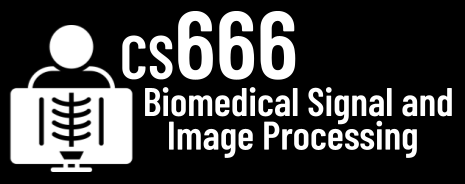

# Assignment 1

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [3]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 6.7 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [4]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

In [5]:
signal

array([2044., 2044., 2044., ..., 2044., 2045., 2043.])

In [6]:
metadata 

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

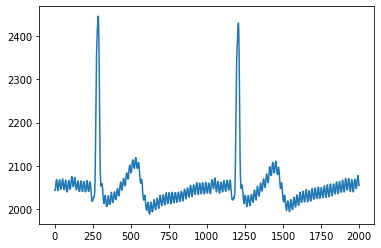

In [7]:
plt.plot(signal[0:2000])

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [8]:
SAMPLING_RATE = metadata['sampling_rate']
N = len(signal)
T = N/ SAMPLING_RATE
print(SAMPLING_RATE)
print(N)
print(T)
SECONDS = 0 ### TODO!

1000.0
15000
15.0


**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [9]:
from biosppy.signals import ecg
out = ecg.ecg(signal=signal, sampling_rate= SAMPLING_RATE, show= False)### TODO



**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

In [10]:
out['filtered']

array([86.59632358, 89.29577068, 91.89768614, ..., 92.65388691,
       89.66260537, 86.55395748])

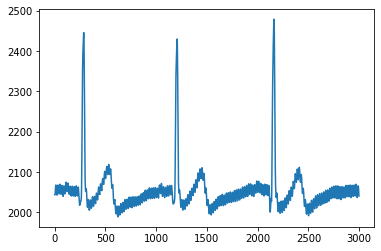

In [11]:
plt.plot(signal[0:int(3*SAMPLING_RATE)])### TODO plot unfiltered signal

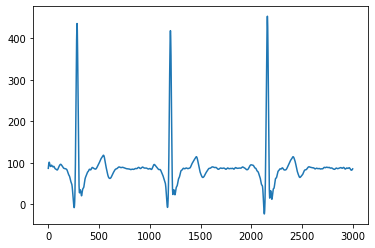

In [12]:
plt.plot(out['filtered'][0:int(3*SAMPLING_RATE)])### TODO plot filtered signal

In [ ]:
Yes, we can easily spot P, Q, R, S and T waves.

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

In [13]:
r = out['rpeaks']### TODO
r

array([  283,  1204,  2159,  3188,  4211,  5188,  6200,  7232,  8200,
        9157, 10156, 11198, 12159, 13139, 14162])

Text(0.5, 0, 'time [s]')

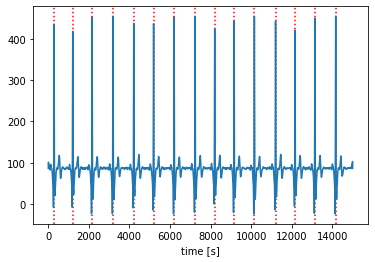

In [14]:
for i in range(0,len(r)):
 plt.axvline(x = r[i], color = 'r', ls=':')   

plt.plot(out['filtered'])
plt.xlabel("time [s]")

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [15]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.2 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [51]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method



In [16]:

_, waves_peak = nk.ecg_delineate(signal, r, sampling_rate=1000, method="peak")

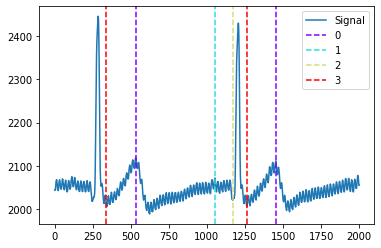

In [17]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:2], 
                       waves_peak['ECG_P_Peaks'][:2],
                       waves_peak['ECG_Q_Peaks'][:2],
                       waves_peak['ECG_S_Peaks'][:2]],
                       signal[:2000])

In [ ]:
# TODO Does the detection work well?
YES

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [18]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
_, waves_peak = nk.ecg_delineate(signal, r, sampling_rate=1000, method="peak")

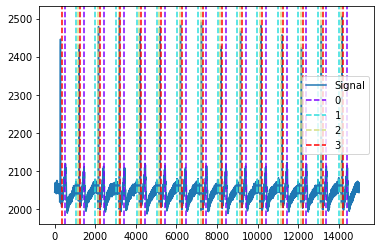

In [19]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:15], 
                       waves_peak['ECG_P_Peaks'][:15],
                       waves_peak['ECG_Q_Peaks'][:15],
                       waves_peak['ECG_S_Peaks'][:15]], 
                       signal[0:])

In [23]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general

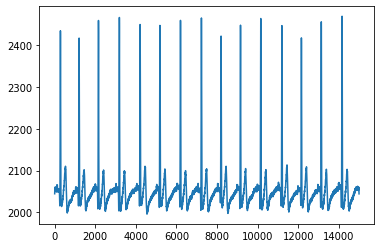

In [20]:
#Low Pass Filtered Signal
fig1 = nk.signal_filter(signal, sampling_rate= SAMPLING_RATE, highcut=40)
plt.plot(fig1)


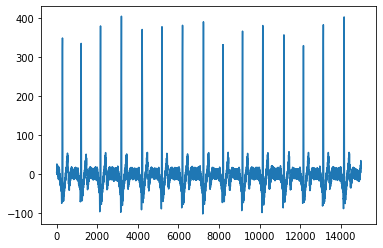

In [21]:
#High Pass Filtered Signal
fig2 = nk.signal_filter(signal, sampling_rate= SAMPLING_RATE, lowcut=3)
plt.plot(fig2)

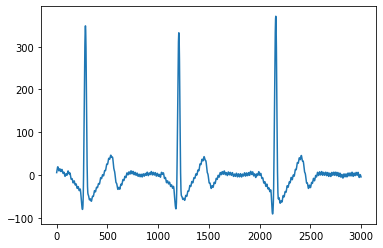

In [23]:

#Band Pass Filter
BPF = nk.signal_filter(signal, sampling_rate= SAMPLING_RATE, highcut=40, lowcut=3)
plt.plot(BPF[:3000])

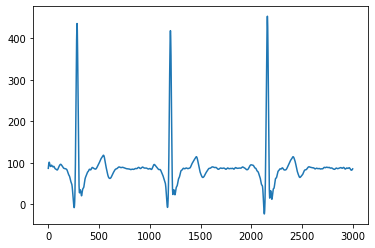

In [20]:

plt.plot(out['filtered'][0:int(3*SAMPLING_RATE)])

# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(out['filtered'], r, sampling_rate=1000, method="peak")

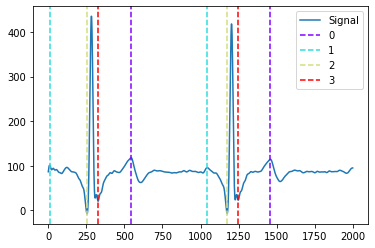

In [35]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:2], 
                       waves_peak['ECG_P_Peaks'][:2],
                       waves_peak['ECG_Q_Peaks'][:2],
                       waves_peak['ECG_S_Peaks'][:2]],
                       out['filtered'][:2000])

In [ ]:
# TODO Which one works the best?
When we compare the graphs that has been generated by Neurokit and BioSPPY, we can understand that the graph generated by Neurokit has a lot of disturbance .i.e, noise. While in BioSPPY the signal generated by it has always been found to be clear. So, we would prefer BioSPPY over Neurokit.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#